# House Prices Prediction.  

## Project Summary.
This project aims to use the [Ames Housing dataset](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) to develop a machine learning model that will predict the price of a house based various features and characteristics of different houses.

## 1. Business Understanding.
The sales price of a house depends on a variety of factors such as the number of bedrooms and the size of the courtyard.  

However a normal home buyer does not begin with a factor such as the height of the basement ceilling when they want to buy a house.  

This clearly shows that the price negotiations that take place during the transaction are dependent on a variety of factors which may not come to mind easily.
The dataset used in this project includes a variety of factors and characteristics of houses which may influence the price of a specific house.  

## 2. Business Problem.
Informed decisions are important when making financial decions for both buyers and sellers.  
   
Home buyers need to understand the expected price ranges and negotiate more effectively reduce financial risks while sellers need to use the price forecasts to plan optimally for project loacations and their budget needs.  

Having price forecasts is thus crucial for both buyers and sellers for informed decisions, risk reductions and strategic planning.

### Objectives.
- To predict the sales price of a each house.
- To develop a at least 3 models and compare their metrics specifically Root-Mean-Squared-Error(RMSE).  
- To develop a forecasting dashboard for end users.  

### Stakeholders.  
- Buyers and Sellers - For informed decisions where buyers can assess affordablity and sellers can set appropriate prices to maimize earnings.
-  Developers and Investors - Developers can plan strategically for optimal prject loactions while investors can identify market trends and reduce investment risks.  
- Governments and Policymakers - Reliable forecasts enable governments to create sensible real estate policies and implement timely regulations.  

### Metrics Of Success.
<!-- - To achieve a model with an RMSE of less than  -->

## 3. Data Understanding
The [Ames Housing dataset](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) is from Kaggle and is a modernized and expanded version of the popular Boston Housing Dataset.  

The dataset contains multiple characteristics of different houses where we have 81 columns each representing a different characteristic of a single house and 1460 rows each representing a single house.  

A few of the Features are listed below, more features about the dataset can be found [here](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data);  
- SalePrice - the property's sale price in dollars.**(Target Variable)**  
- MSSubClass: The building class.  
- MSZoning: The general zoning classification.  
- LotFrontage: Linear feet of street connected to property.  
- LotArea: Lot size in square feet.  
- Street: Type of road access.  
- Alley: Type of alley access.  
- LotShape: General shape of property.  
- LandContour: Flatness of the property.  

 >### 3.1 Load the dataset.
We begin by loading the dataset into a pandas Dataframe for further processing and analyis. This allows us to inspect the dataset structure and to understang more about the dataset.  
Once the dataset is loaded we explore its shape, features and first few records.  


In [ ]:
#relevent libraries
import pandas as pd

#load into a pandas dataframe
df = pd.read_csv("/content/train.csv")

#view the shape of the data frame
print(f"This dataset has {df.shape[0]} rows and {df.shape[1]} columns")

#view columns/features
print(f"""This dataset includes the following features:
        {df.columns}""")
#view first few records
df.head()

This dataset has 1460 rows and 81 columns
This dataset includes the following features:
        Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYr

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


 >### 3.2 Dataset Information
 We also examine the basic structute of the data to understannd its composition: the number of entries, datatypes and missing values.  

In [ ]:
#general overview of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

>### 3.3 General Statistics
In this step we genreate descriptive statistics of the dataset to understand the disrtibution of numerical features. this includes Statistical measures such as mean, standard deciation, minimum and maximum values for each numerical column.

In [ ]:
#general statistics
print(df.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

 >### 3.3 Missing Values and Duplicates
 We check for missing values and duplicates in the dataset and evaluate their number to decide the appropriate way for handling them

In [ ]:
#check for missing values
print(f"Tht dataset contains {df.isnull().sum().sum()} missing values and {df.duplicated().sum()} duplicates")

Tht dataset contains 7829 missing values and 0 duplicates


## 4. Data Cleaning
We clean the dataset by handling missing values, standardizing data and identifying relevant columns for our analysis.   

>### 4.1 Handling Missing Values.  
Our dataset has numerous missing values and dropping the missing values may result in losing all the records hence we fill the missing values with zeros.

In [ ]:
#handle missing values and re-evaluate the shape
df = df.fillna(0)
df.shape

(1460, 81)

In [ ]:
df.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
#identify categorical and numerical features
#Distribution of Various Categorical Features

numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
print(f"""Numerical Features :

{numerical_features}\n""")

categorical_features = df.select_dtypes(include=['object']).columns
print(f"""Categorical Features :

{categorical_features}""")

Numerical Features :

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

Categorical Features :

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'Bsm

## 5.Exploratory Data Analysis




In [ ]:
#necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



>### 5.1 Univariate Analysis



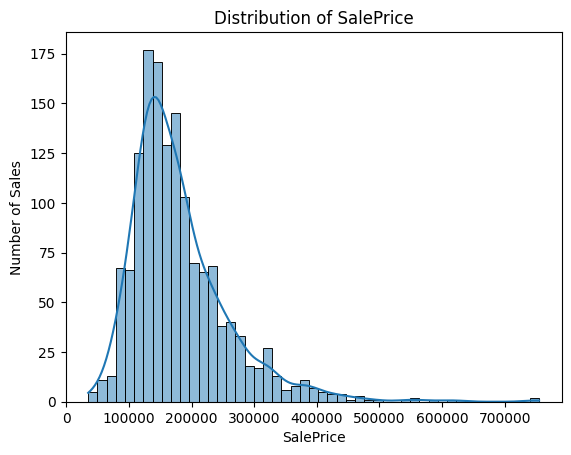

In [ ]:
#saleprice distribution
sns.histplot(data=df, x="SalePrice", kde=True)
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Number of Sales")
plt.show()

In [ ]:
import matplotlib.pyplot as plt

def categorical_features_plot(data, feature):
    """Parameters: data(dataframe), feature(string i.e a categorical feature in the dataframe)
    This function takes in the input data and generates a countplot for a categorical feature"""

    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=feature)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Number of Sales")
    plt.show()

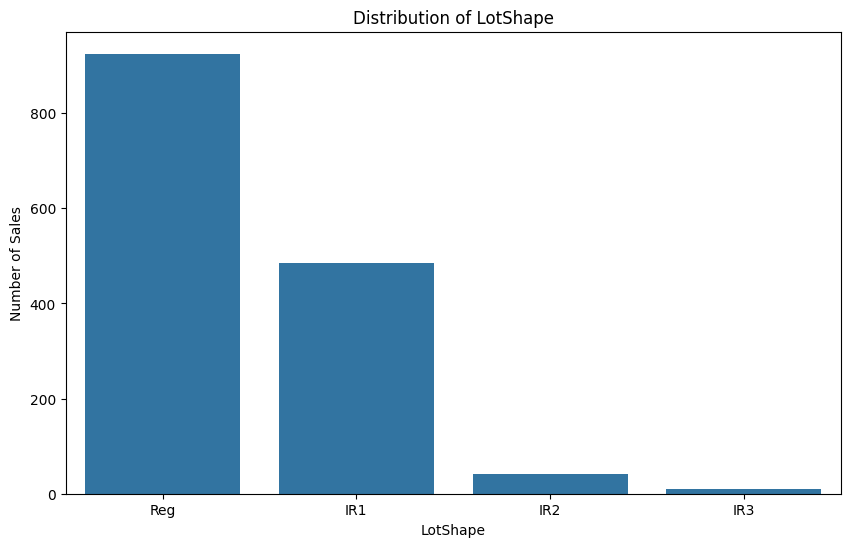

In [ ]:
categorical_features_plot(df, "LotShape")

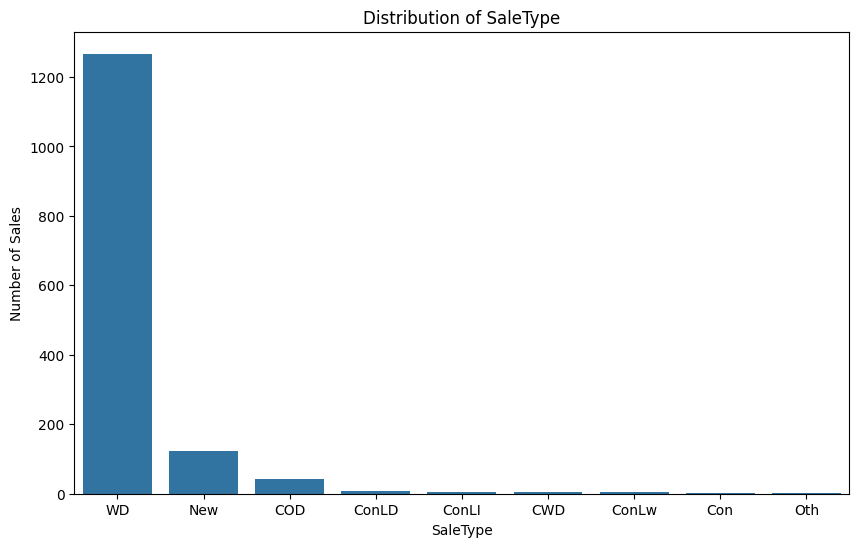

In [ ]:
categorical_features_plot(df, "SaleType")

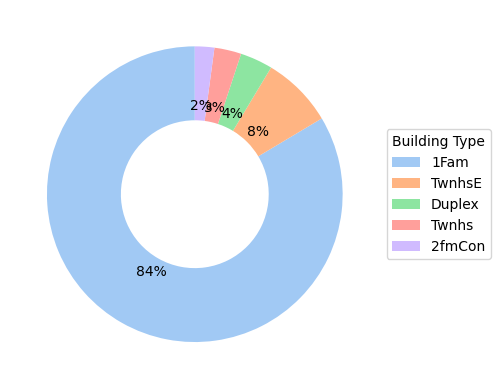

In [ ]:
data = df["BldgType"].value_counts()
labels = data.index.tolist()  # Use the index of the value counts as labels
colors = sns.color_palette('pastel')

fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(
    data,
    #labels=labels,
    colors=colors,
    startangle=90,
    autopct='%.0f%%',
    wedgeprops=dict(width=0.5)
)

ax.legend(wedges, labels, title="Building Type", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

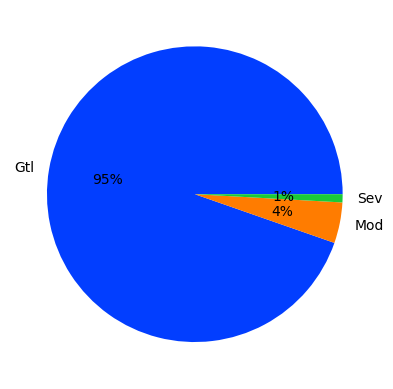

In [ ]:
data = df["LandSlope"].value_counts()
labels = data.index.tolist()
# define Seaborn color palette to use
colors = sns.color_palette('bright')

# plotting data on chart
plt.pie(data, labels=labels, colors=colors, autopct='%.0f%%')
plt.show()

In [ ]:
numerical_features


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [ ]:
def numerical_features_histplot(data, feature):
    """Parameters: data(dataframe), feature(string i.e a numerical feature in the dataframe)
    This function takes in the input data and generates a histogram for a numerical feature"""

    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=feature, kde=True)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Number of Sales")
    plt.show()

def numerical_features_boxplot(data, feature):
    """Parameters: data(dataframe), feature(string i.e a numerical feature in the dataframe)
    This function takes in the input data and generates a boxplot for a numerical feature"""

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x=feature)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Number of Sales")
    plt.show()




In [ ]:
numerical_features

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

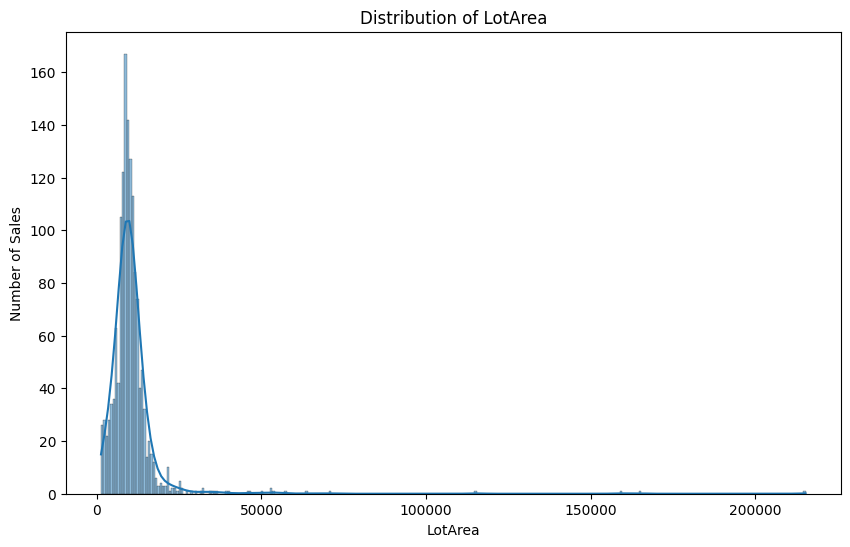

In [ ]:
numerical_features_histplot(df, "LotArea")

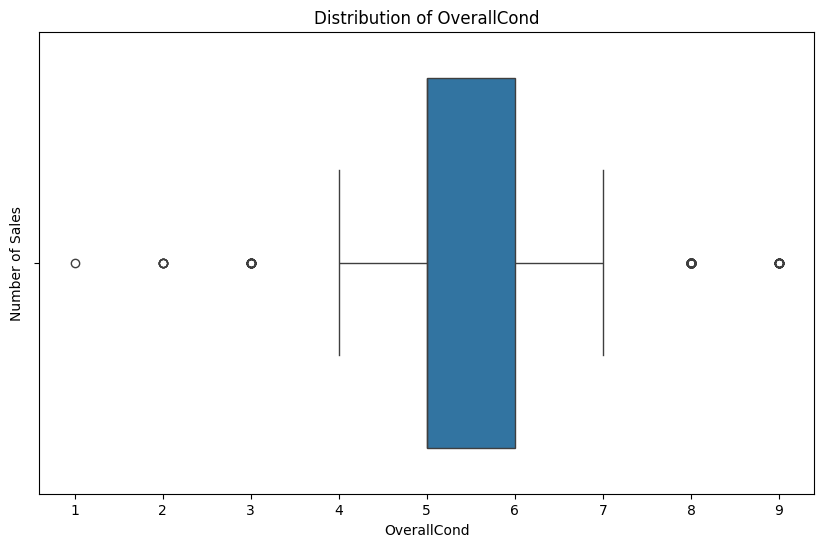

In [ ]:
numerical_features_boxplot(df, "OverallCond")

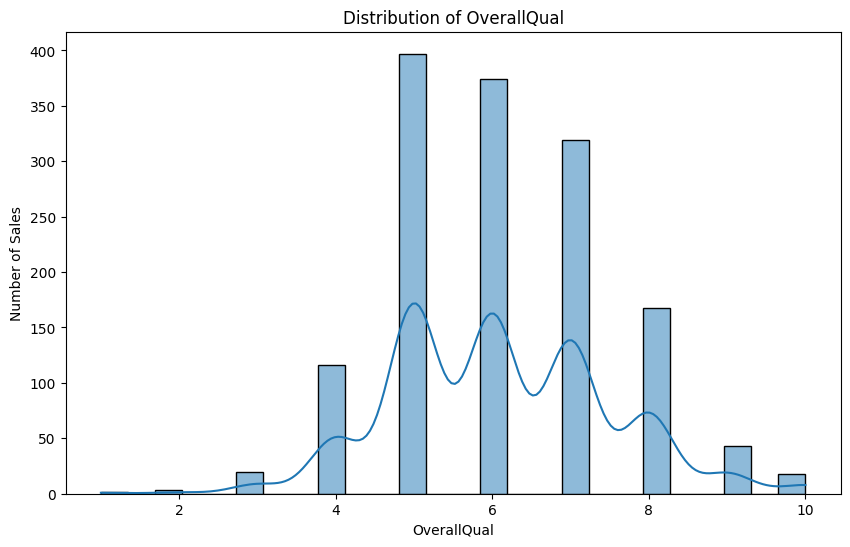

In [ ]:
numerical_features_histplot(df, "OverallQual")

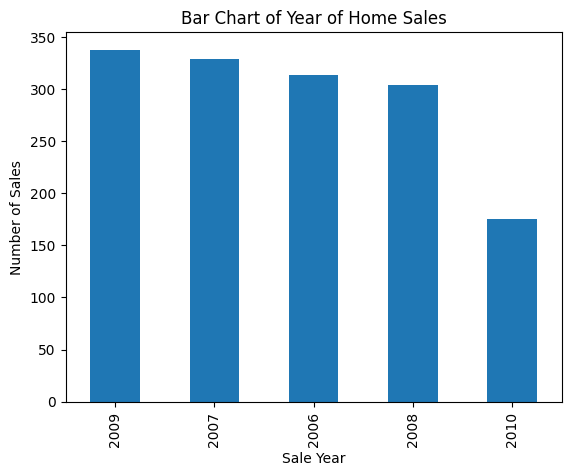

In [ ]:
df['YrSold'].value_counts().plot(kind='bar')
plt.title("Bar Chart of Year of Home Sales")
plt.xlabel('Sale Year')
plt.ylabel('Number of Sales');

>### 5.2 Bivariate Analysis

In [ ]:
numerical_features

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [ ]:
def plot_scatter(data, x, y):
    """Parameters: data(dataframe), x(string i.e a numerical feature in the dataframe),
    y(string i.e a numerical feature in the dataframe)
    This function takes in the input data and generates a scatterplot for Bivariate Analysis
    """
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=x, y=y)
    plt.title(f"Relationship between {x} and {y}")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

def plot_bar(data, x, y):
    """Parameters: data(dataframe), x(string i.e a categorical feature in the dataframe),
    y(string i.e a numerical feature in the dataframe)
    This function takes in the input data and generates a barplot for Bivariate Analysis
    """
    plt.figure(figsize=(10, 6))
    sns.barplot(data=data, x=x, y=y)
    plt.title(f"BarPlot of {x} and {y}")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()





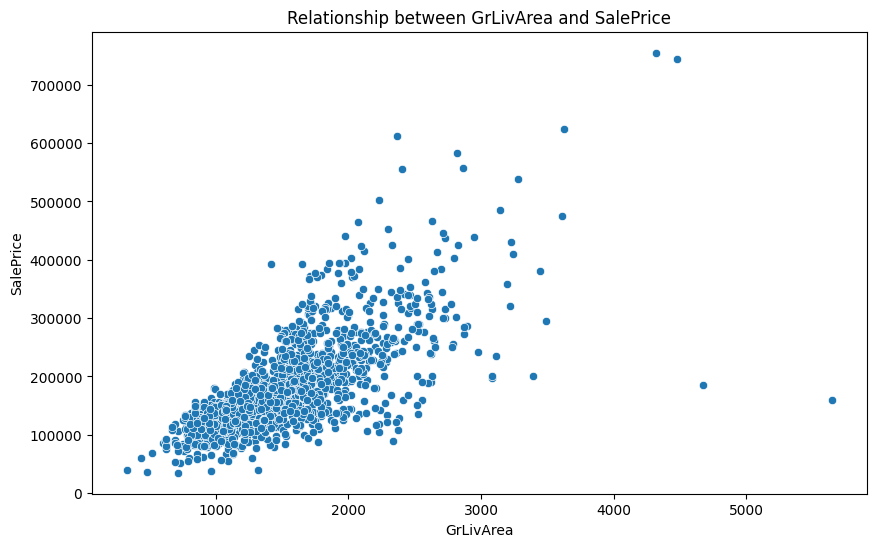

In [ ]:
plot_scatter(df, "GrLivArea", "SalePrice")

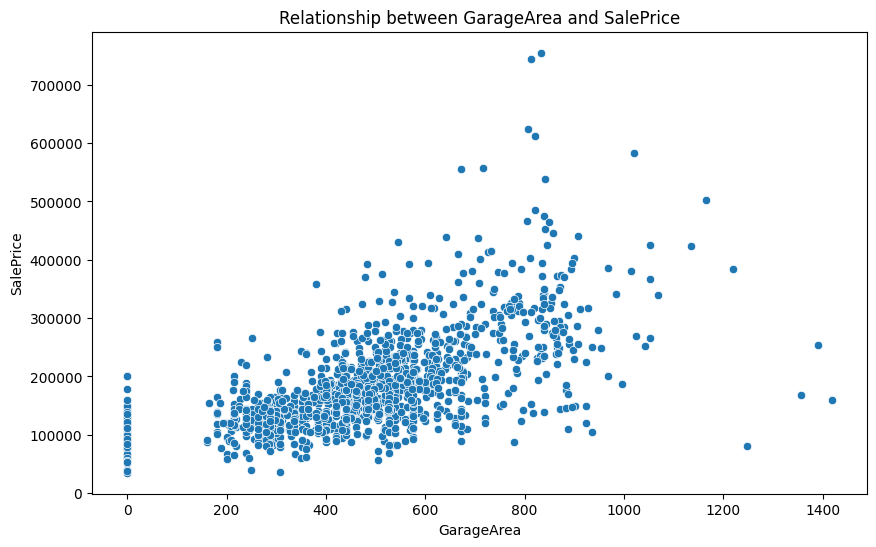

In [ ]:
plot_scatter(df, "GarageArea", "SalePrice")

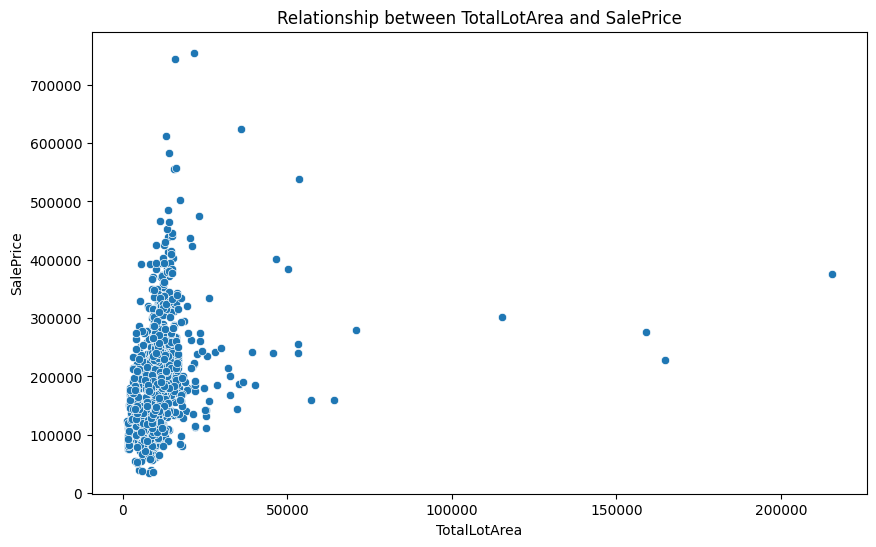

In [ ]:
df["TotalLotArea"] = df["LotArea"] + df["LotFrontage"]
plot_scatter(df, "TotalLotArea", "SalePrice")

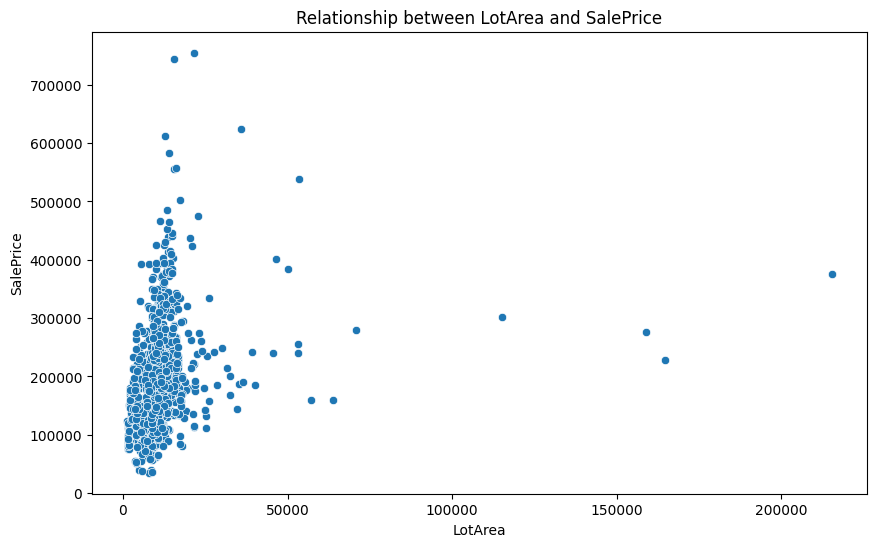

In [ ]:
plot_scatter(df, "LotArea", "SalePrice")

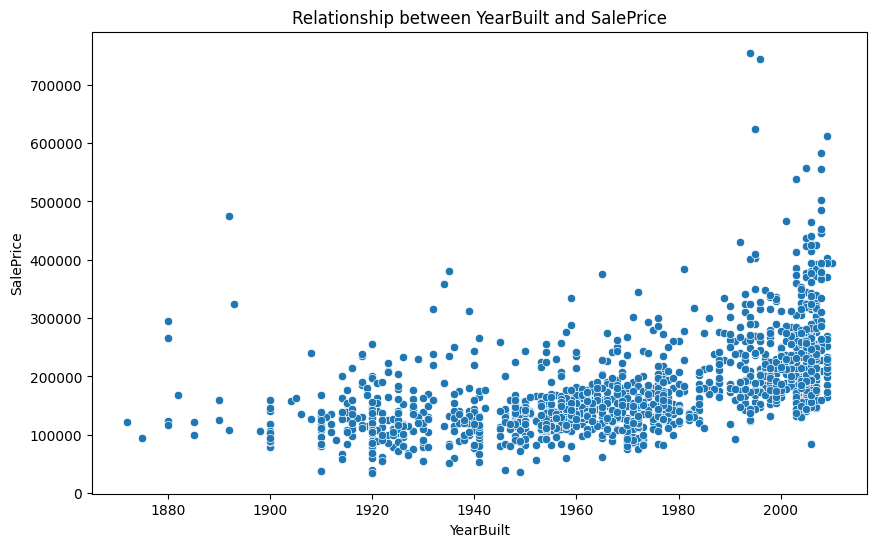

In [ ]:
plot_scatter(df, "YearBuilt", "SalePrice")

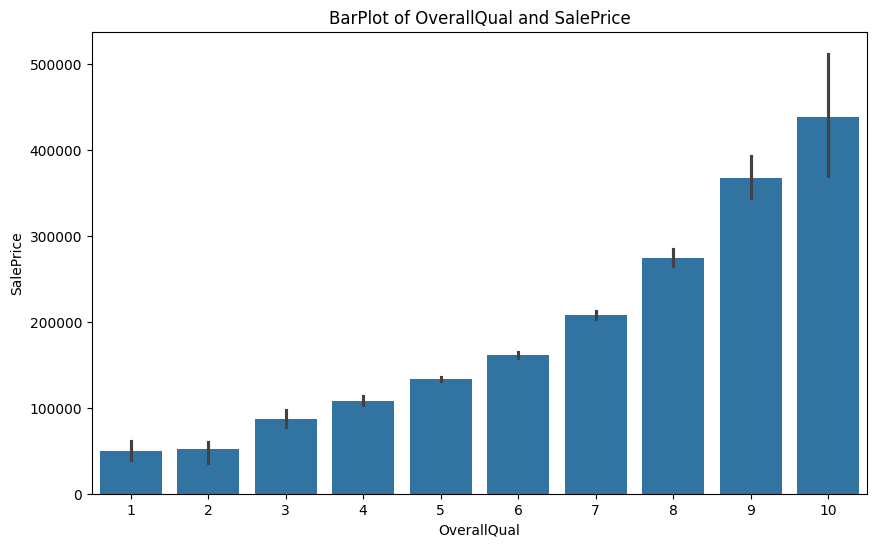

In [ ]:
plot_bar(df, "OverallQual", "SalePrice")

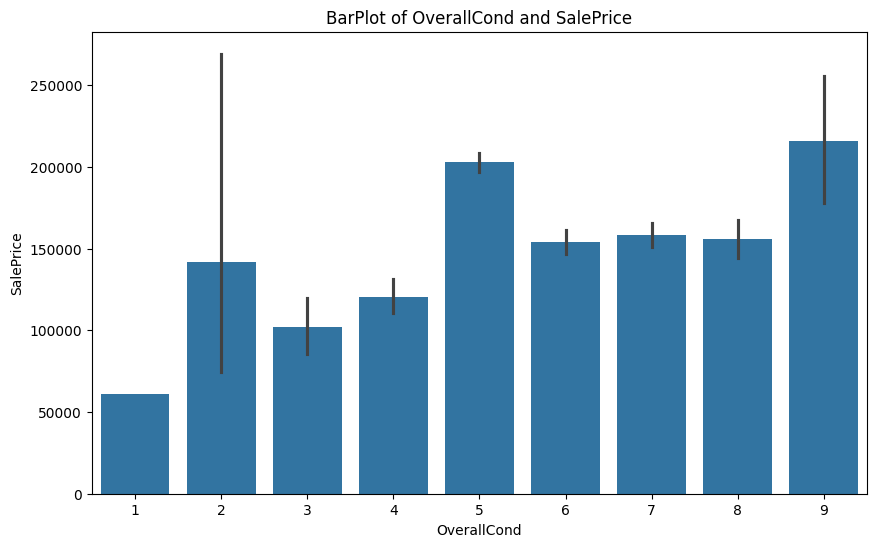

In [ ]:
plot_bar(df, "OverallCond", "SalePrice")

>### 5.2 Multivariate Analysis

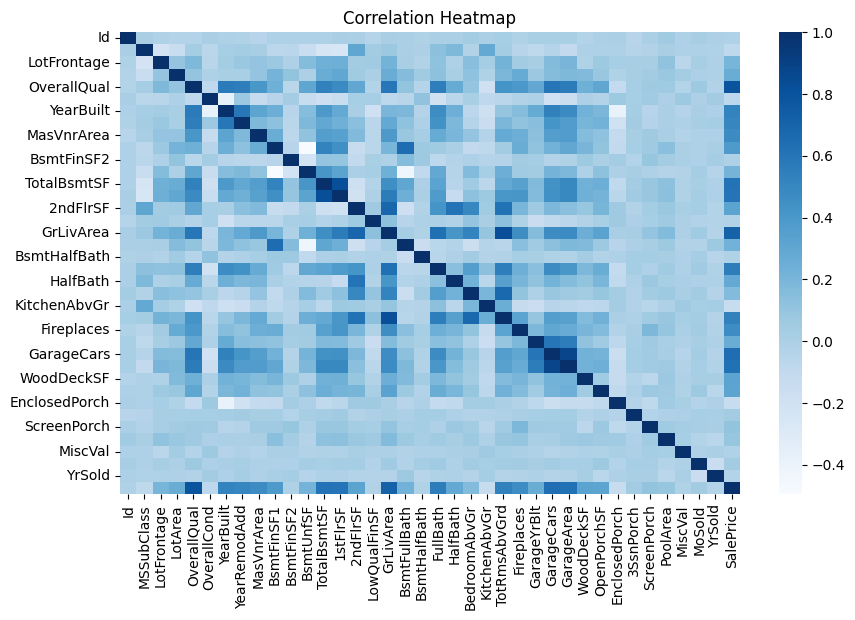

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_features].corr(), annot=False, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()

Feature Engineering.  
Derive new features
  1. total_suf_area = total square footage i.e 1st and 2nd Floor Surface Area and TotalBmstSf(Total basement surface area)
  2. finished_suf_area = Same as total suface area but excludes unfinished basement i.e 1st + 2nd Floor Surface Area - BsmtUnfSF(Basement unfinised surfacea rea)
  3. highqual_suf_area = 1st + 2nd Floor S.A + TotalBmstSF - LowQualFinSF(Low Quality Finished surface area)
  4. finished_baths = full baths + half baths
  5. age = YrSold - YearBuilt
  6. avg_qual_cond = (OverallQuall + OverallCond)/2
  


In [ ]:
class addfeatures:
  def __init__(self, df):
    self.df = df

  def total_suf_area(self):
    self.df["total_suf_area"] = self.df["1stFlrSF"] + self.df["2ndFlrSF"] + self.df["TotalBsmtSF"]

  def finished_suf_area(self):
    self.df["finished_suf_area"] = self.df["1stFlrSF"] + self.df["2ndFlrSF"] - self.df["BsmtUnfSF"]

  def highqual_suf_area(self):
    self.df["highqual_suf_area"] = self.df["1stFlrSF"] + self.df["2ndFlrSF"] + self.df["TotalBsmtSF"]

  def finished_baths(self):
    self.df["finished_baths"] = self.df["FullBath"] + self.df["HalfBath"]

  def age(self):
    self.df["age"] = self.df["YrSold"] - self.df["YearBuilt"]

  def avg_qual_cond(self):
    self.df["avg_qual_cond"] = (self.df["OverallQual"] + self.df["OverallCond"]) / 2



In [ ]:
df["total_suf_area"] = df["1stFlrSF"] + df["2ndFlrSF"] + df["TotalBsmtSF"]
df["finished_suf_area"] = df["1stFlrSF"] + df["2ndFlrSF"] - df["BsmtUnfSF"]
df["highqual_suf_area"] = df["1stFlrSF"] + df["2ndFlrSF"] + df["TotalBsmtSF"] - df["LowQualFinSF"]
df["finished_baths"] = df["FullBath"] + df["HalfBath"]
df["age"] = df["YrSold"] - df["YearBuilt"]
df["avg_qual_cond"] = (df["OverallQual"] + df["OverallCond"]) / 2

new_features = ["total_suf_area", "finished_suf_area", "highqual_suf_area", "finished_baths", "age", "avg_qual_cond", "SalePrice"]
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
numerical_features2 = df.select_dtypes(include=['int64', 'float64']).columns
len(numerical_features2)

45

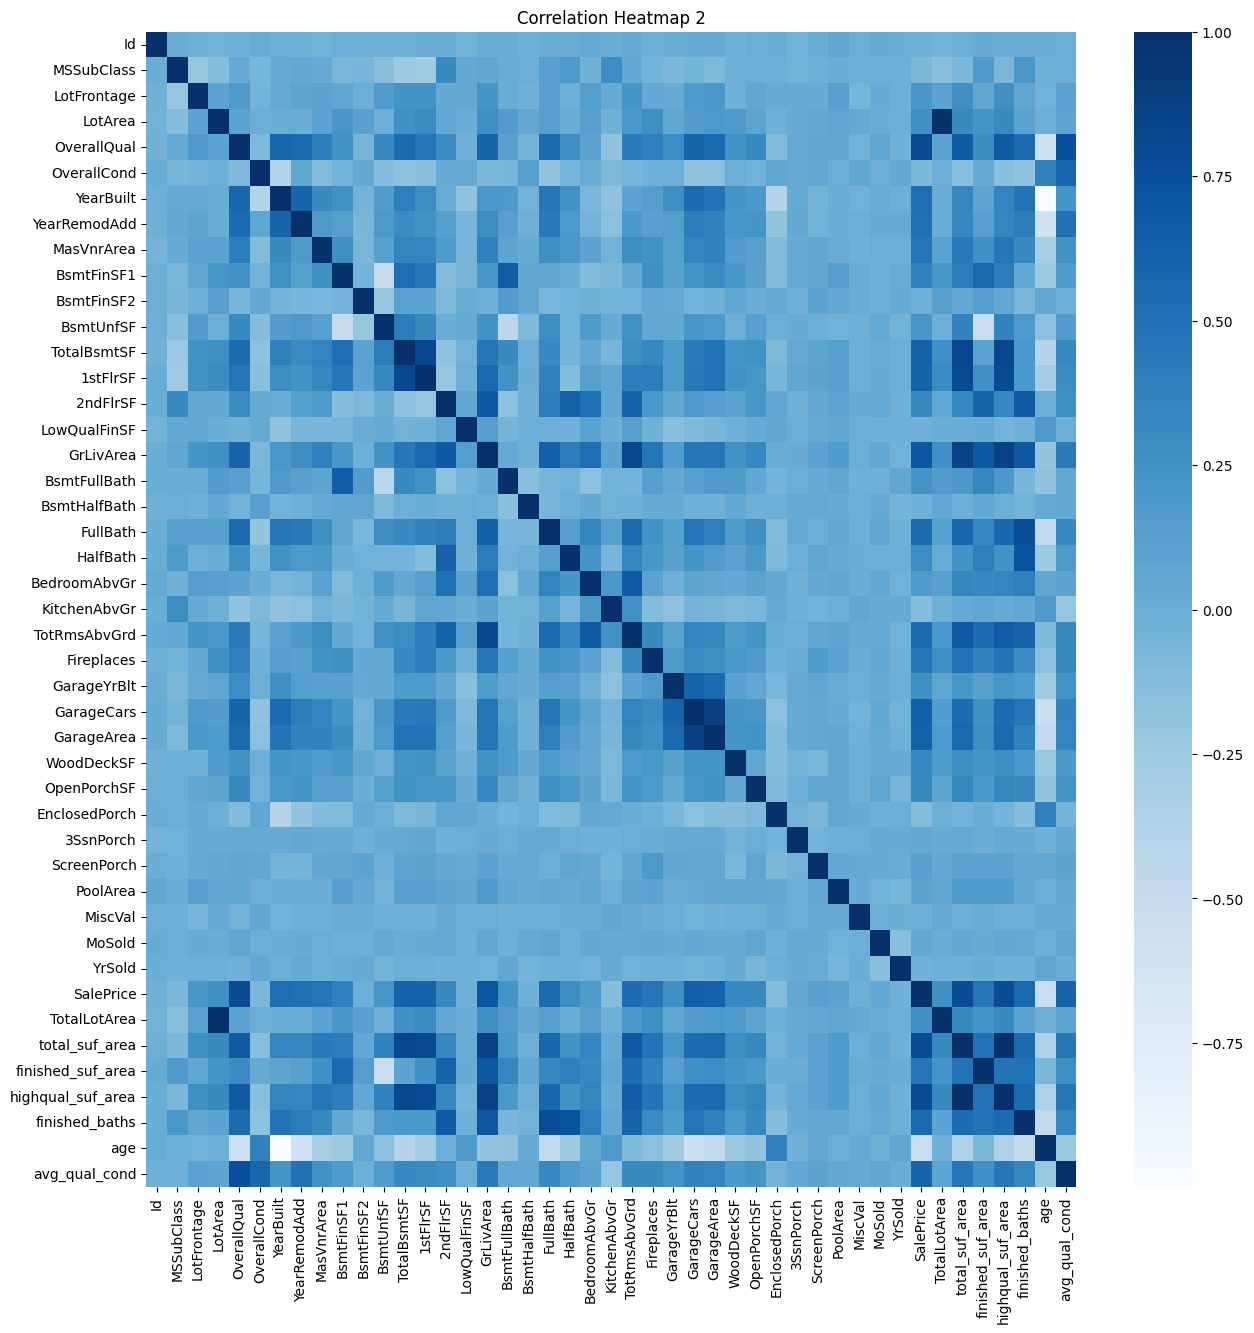

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(df[numerical_features2].corr(), annot=False, cmap='Blues')
plt.title("Correlation Heatmap 2")
plt.show()




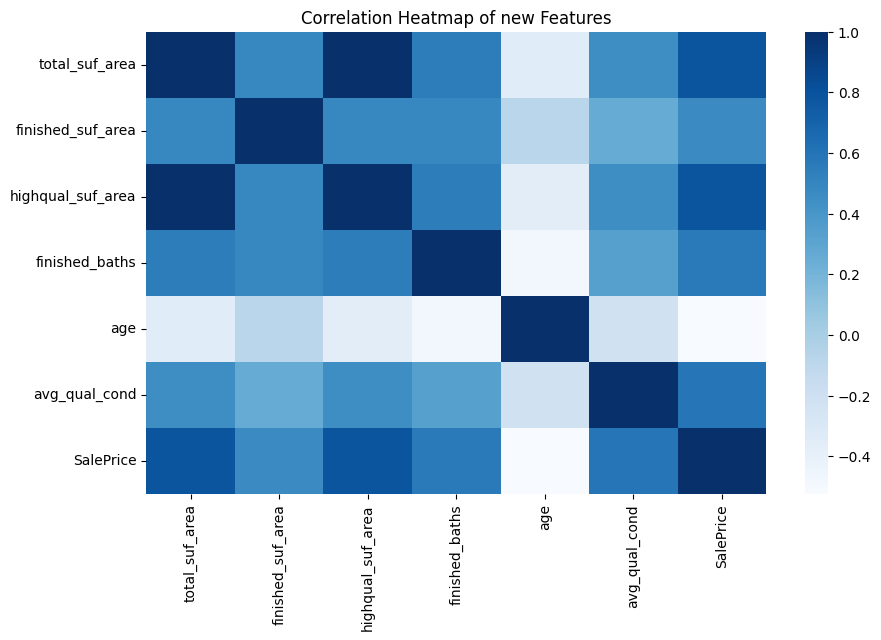

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[new_features].corr(), annot=False, cmap='Blues')
plt.title("Correlation Heatmap of new Features")
plt.show()

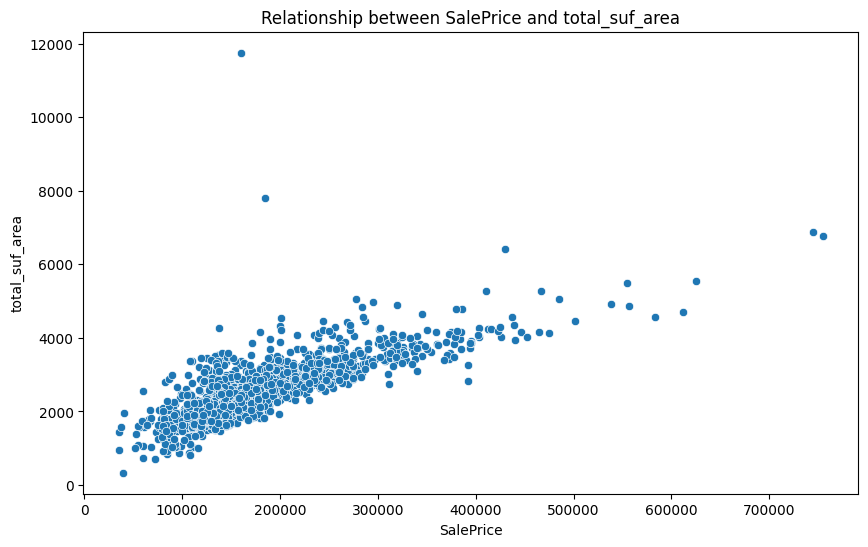

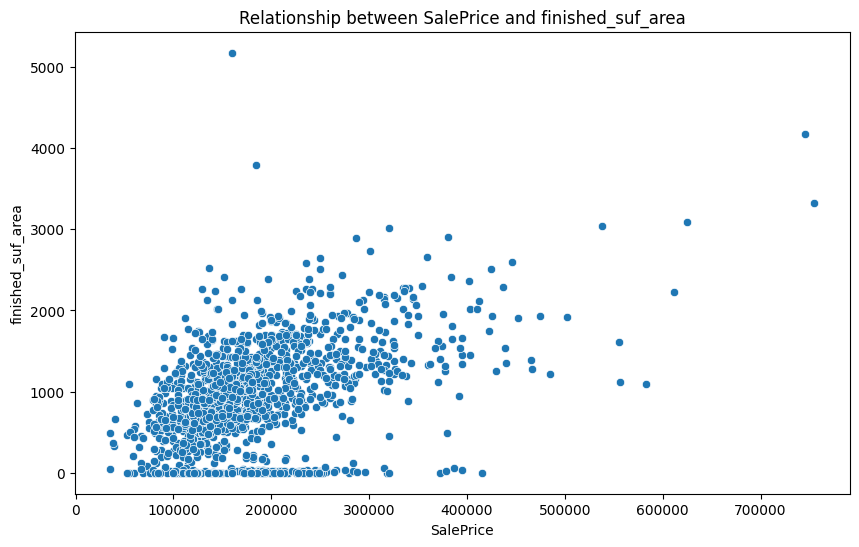

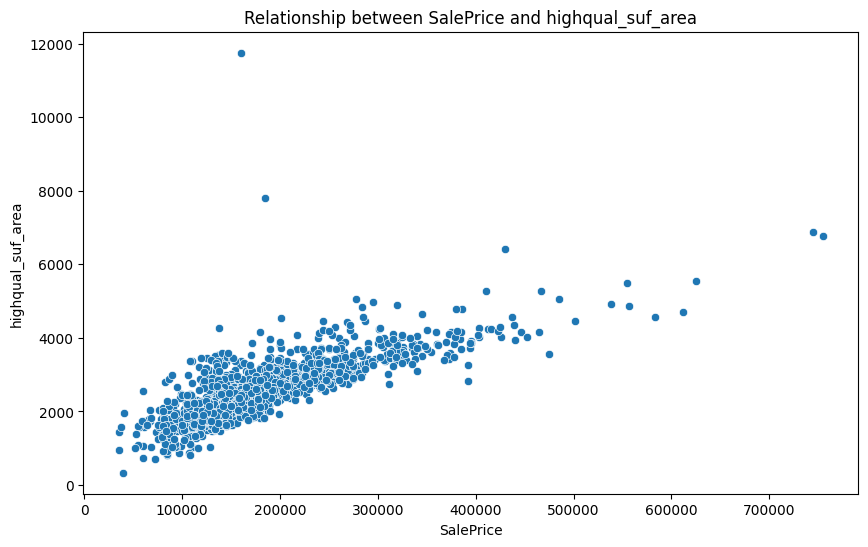

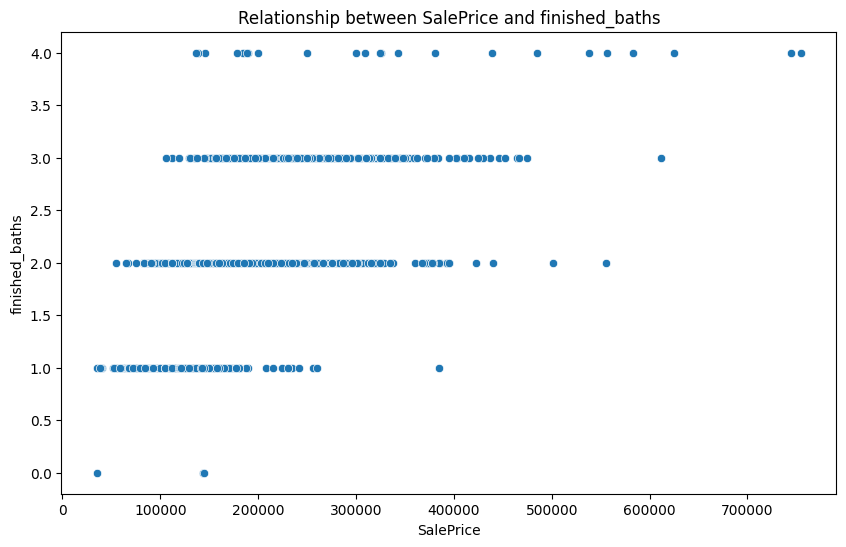

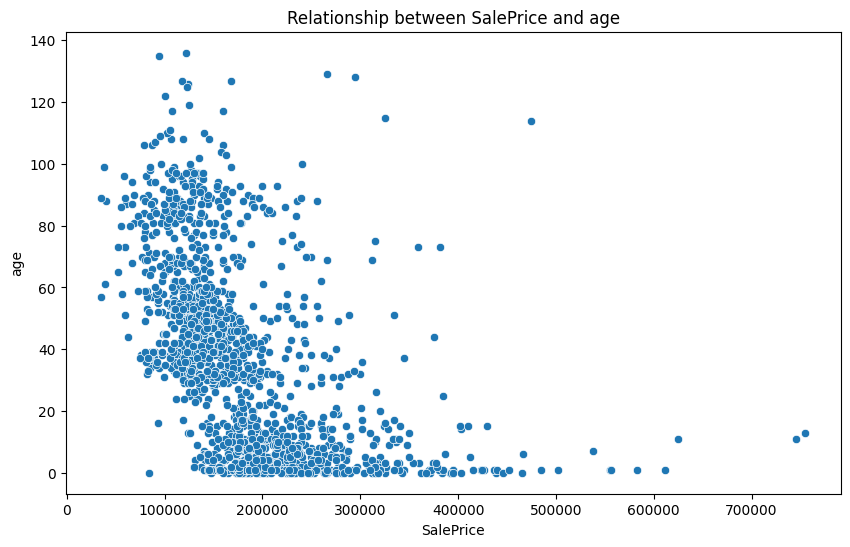

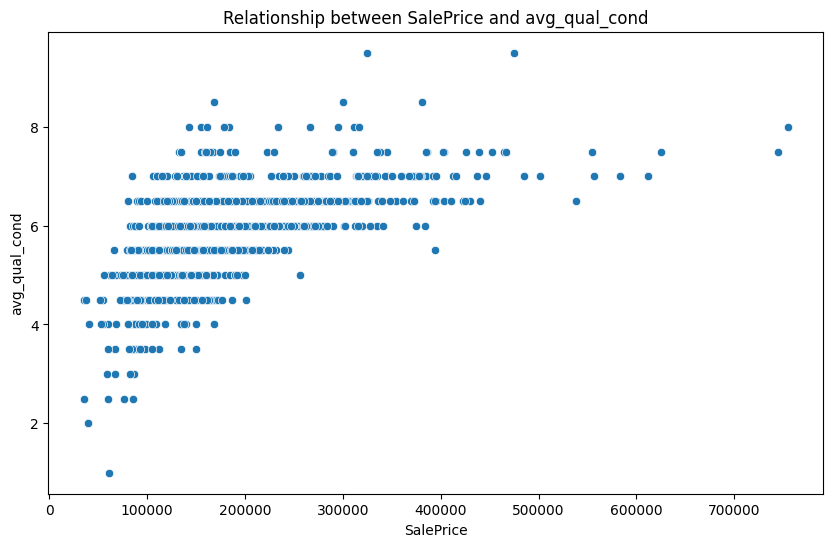

In [ ]:
for y in new_features[:6]:
  plot_scatter(df, "SalePrice", y)

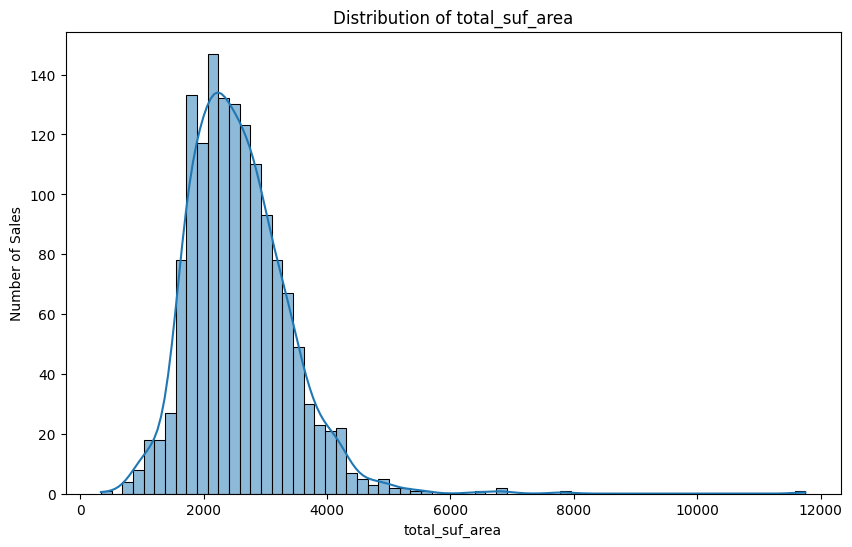

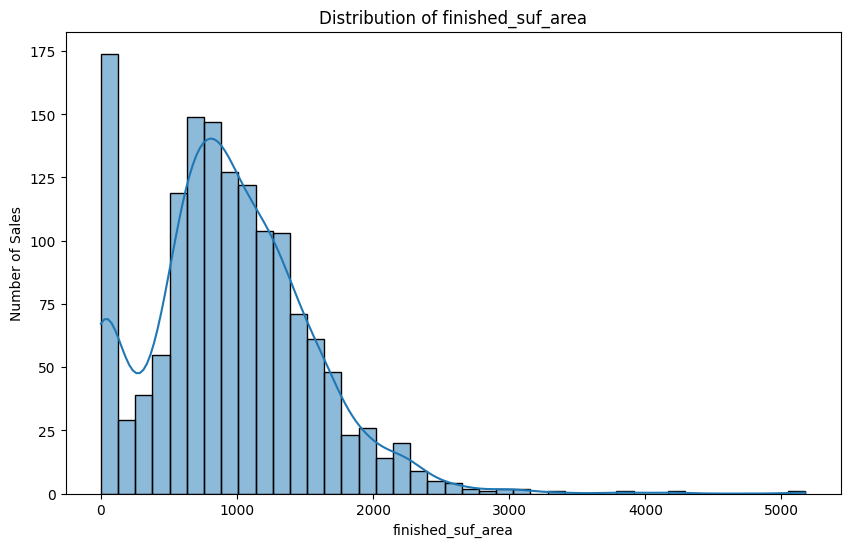

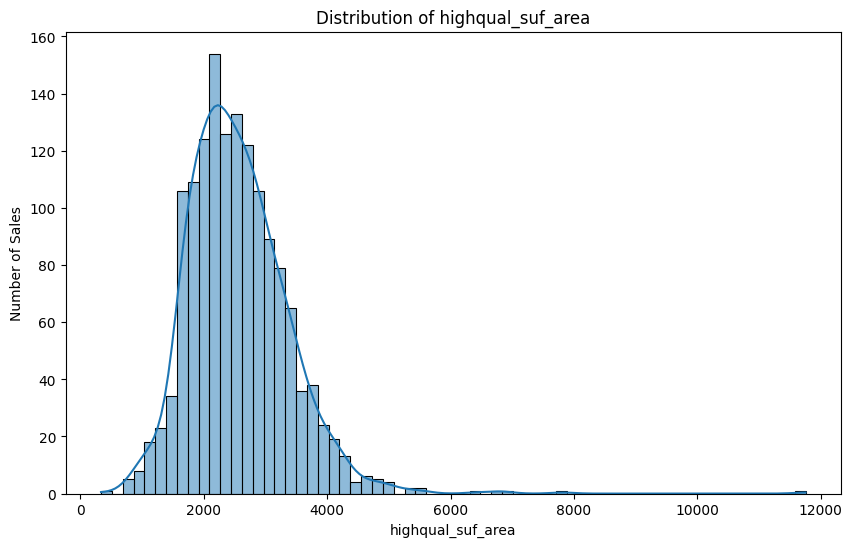

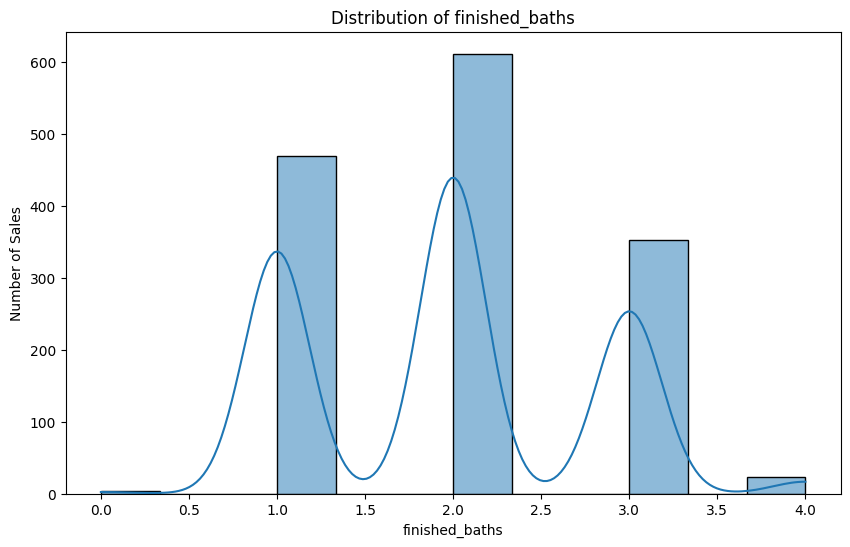

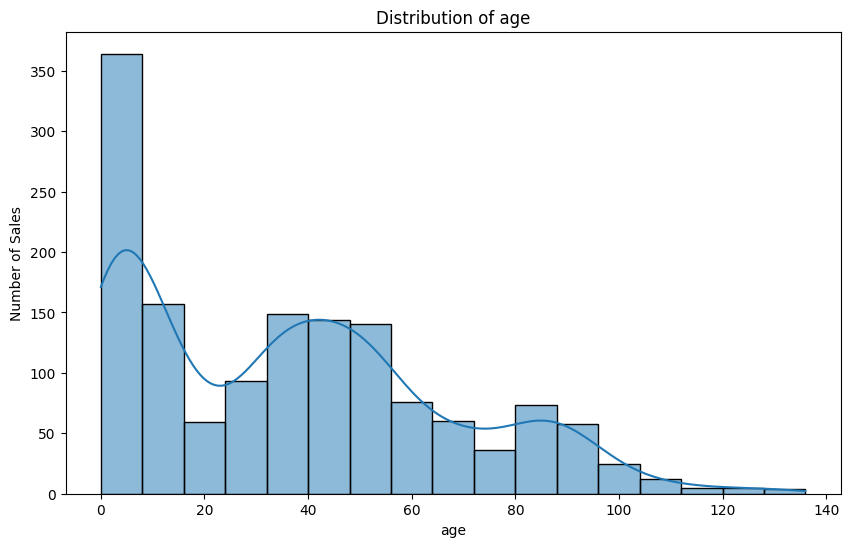

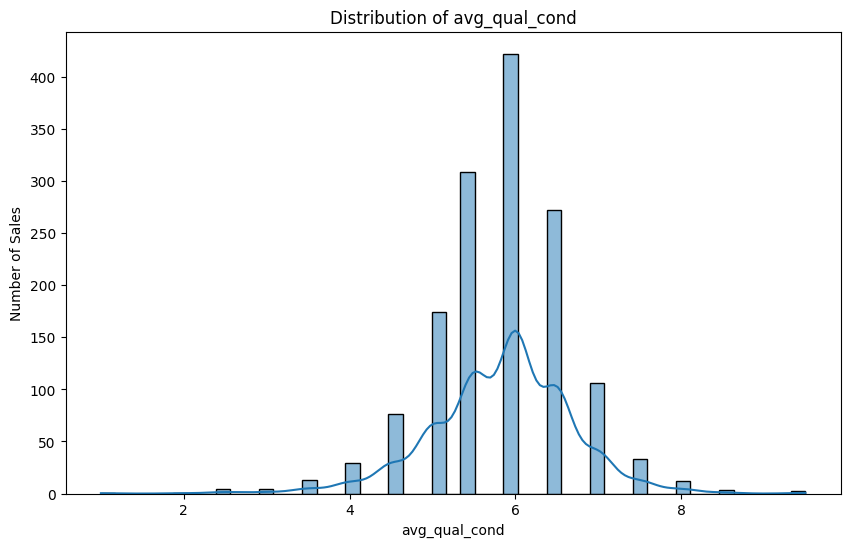

In [ ]:
for x in new_features[:6]:
  numerical_features_histplot(df, x)